In [1]:
library(forecast)
source('https://nmimoto.github.io/R/TS-00.txt')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




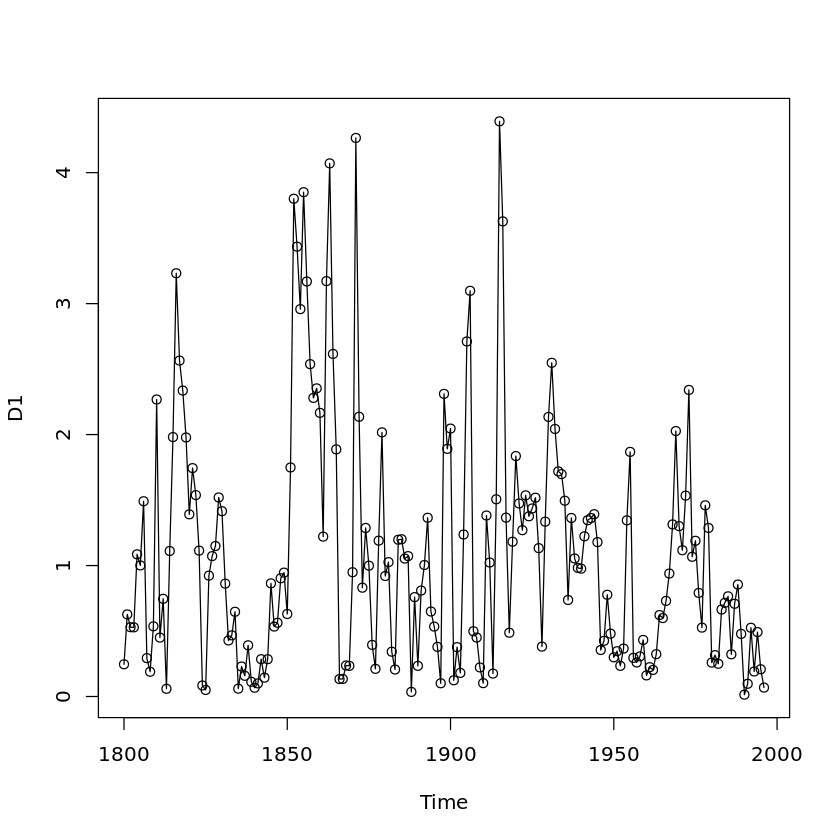

In [2]:
D <- read.csv("https://nmimoto.github.io/datasets/copper.csv")
D1 <- ts(D[,2], start=c(1800,1), freq=1)
plot(D1, type='o')

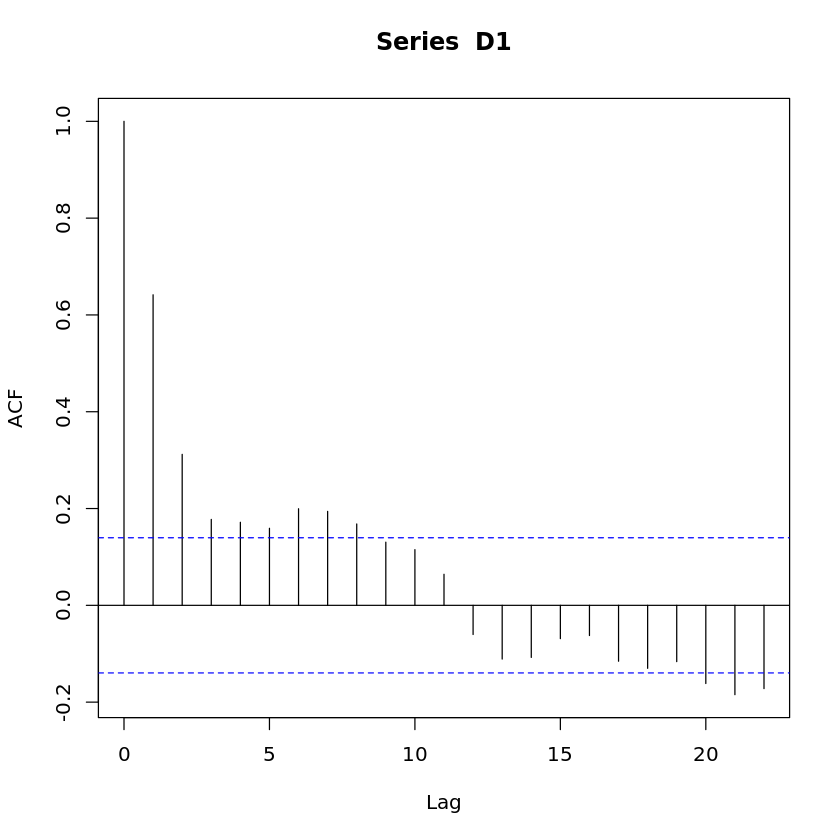

In [3]:
acf(D1)

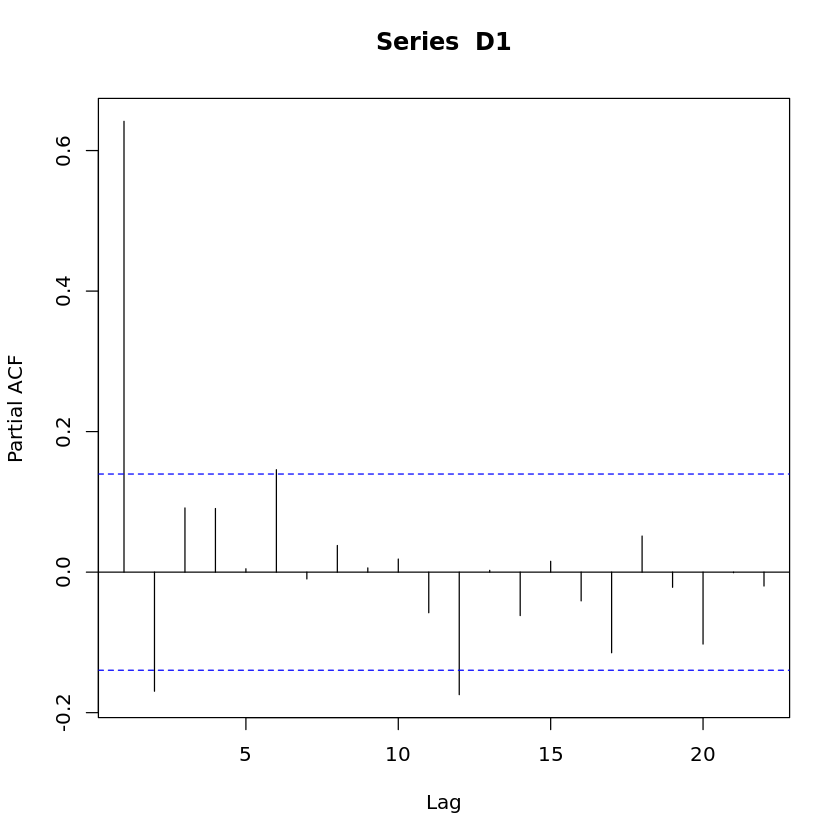

In [4]:
pacf(D1)

In [5]:
auto.arima(D1)

Series: D1 
ARIMA(1,0,3) with non-zero mean 

Coefficients:
         ar1      ma1      ma2      ma3    mean
      0.8695  -0.0925  -0.2958  -0.1809  1.0607
s.e.  0.0865   0.1129   0.0921   0.0751  0.1590

sigma^2 estimated as 0.4809:  log likelihood=-205.24
AIC=422.47   AICc=422.91   BIC=442.17

In [6]:
auto.arima(D1, stepwise=FALSE, approximation=FALSE)

Series: D1 
ARIMA(2,0,3) with non-zero mean 

Coefficients:
         ar1     ar2     ma1      ma2      ma3    mean
      0.2139  0.5447  0.5568  -0.3726  -0.3699  1.0589
s.e.  0.2172  0.1599  0.2184   0.1623   0.1022  0.1613

sigma^2 estimated as 0.4765:  log likelihood=-203.88
AIC=421.76   AICc=422.35   BIC=444.74

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.884,0.847,0.608,0.143,0.037,0,0.681


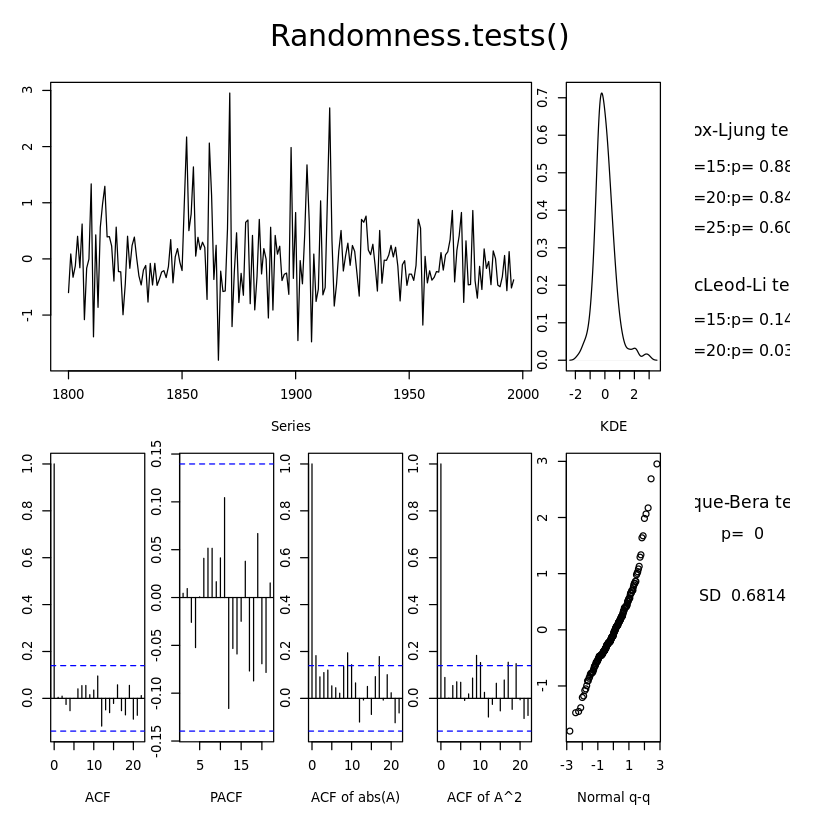

In [7]:
Fit01 <- Arima(D1, order=c(2,0,3))
Randomness.tests(Fit01$resid)

In [11]:
  #--- Rolling 1-step prediction with fixed windows
library(forecast)
Y <- D1
window.size <- 150   # Entire data set
order.in <- c(2,0,3) # Model order
include_mean <- TRUE

Yhat.CIu <- 0
Yhat.CIl <- 0
Yhat <- 0


#Yhat <- Yhat.CIu < Yhat.CIl <- 0  # Intitialize what needs to be saved
for (i in 1:(length(Y)-window.size)) {
    # Force to fit model
    Fit00 <- Arima(Y[i:(i+window.size-1)], order=order.in, include.mean=include_mean)
    
    Y.h <- predict(Fit00, n.ahead=1)  # one step prediction
    Yhat[i] <- Y.h$pred
    Yhat.CIu[i] <- Yhat[i]+1.96*Y.h$se
    Yhat.CIl[i] <- Yhat[i]-1.96*Y.h$se
}

# Yhat starts at window.size+1 up to length(Y)
Yhat = ts(Yhat, start=time(Y)[window.size+1], freq=frequency(Y))
Yhat.CIu = ts(Yhat.CIu, start=time(Y)[window.size+1], freq=frequency(Y))
Yhat.CIl = ts(Yhat.CIl, start=time(Y)[window.size+1], freq=frequency(Y))
Y1 = window(Y, end=time(Y)[window.size], freq=frequency(Y))
Y2 = window(Y, start=time(Y)[window.size+1], freq=frequency(Y))

# Calculate prediction performance
Pred.error = Y2 - Yhat
Pred.rMSE = sqrt(mean((Pred.error)^2))
c(mean(Pred.error), Pred.rMSE)

[1] -0.1584348  0.4657376

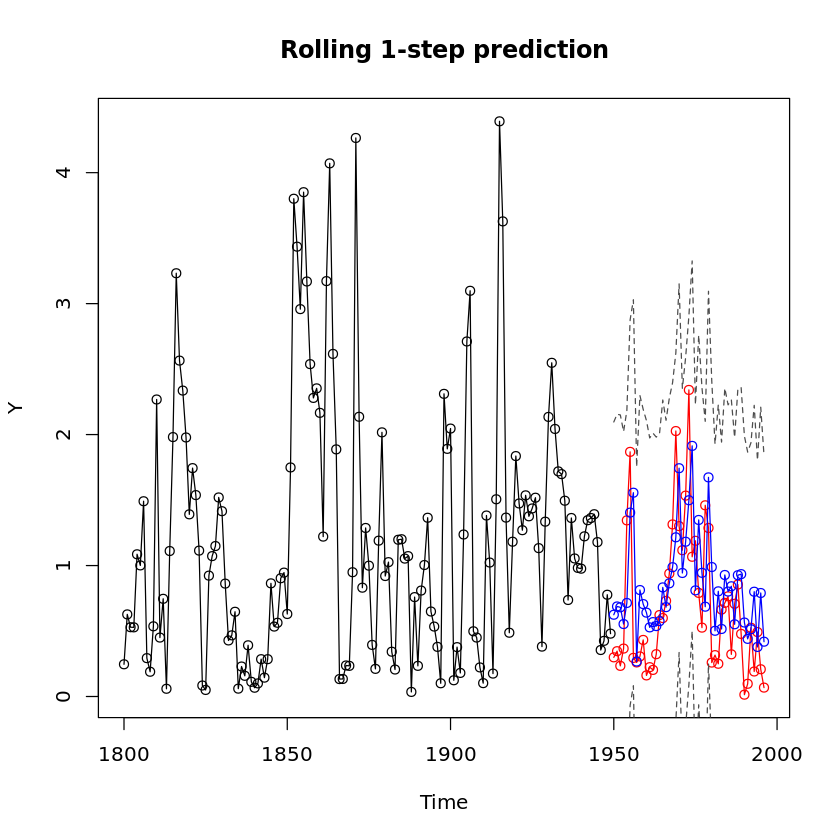

In [17]:
plot(Y, type="n", main="Rolling 1-step prediction")
lines(Y1, type="o")
lines(Y2, type="o", col="red")
lines(Yhat, type="o", col="blue")
lines(Yhat.CIu, type="l", col="gray30", lty=2)
lines(Yhat.CIl, type="l", col="gray30", lty=2)

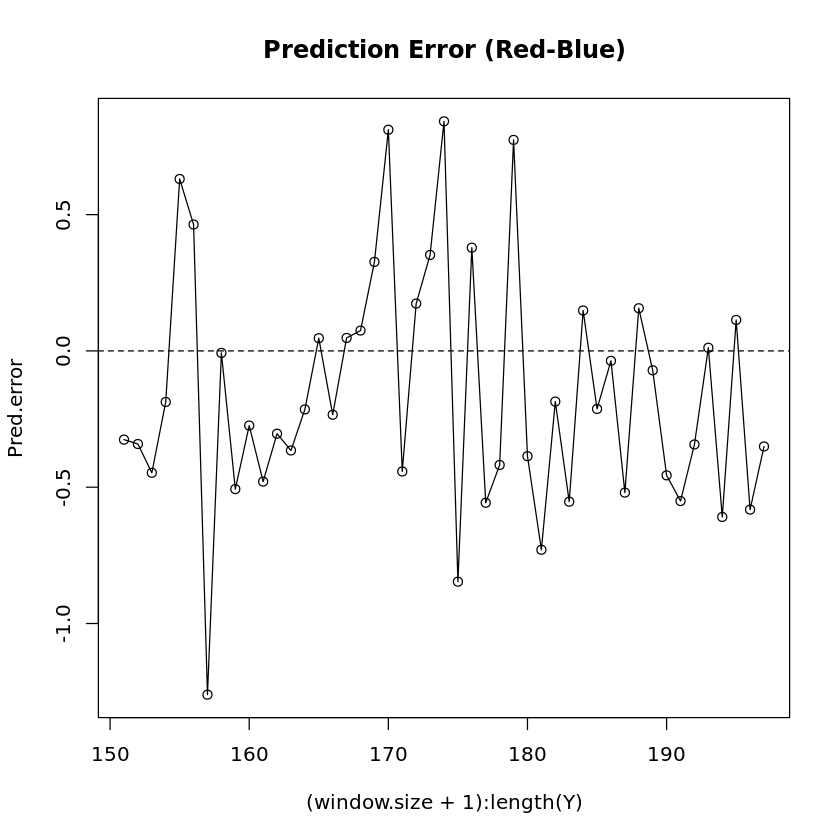

In [19]:
plot((window.size+1):length(Y), Pred.error, type="o", main="Prediction Error (Red-Blue)")
abline(h=0, lty=2)

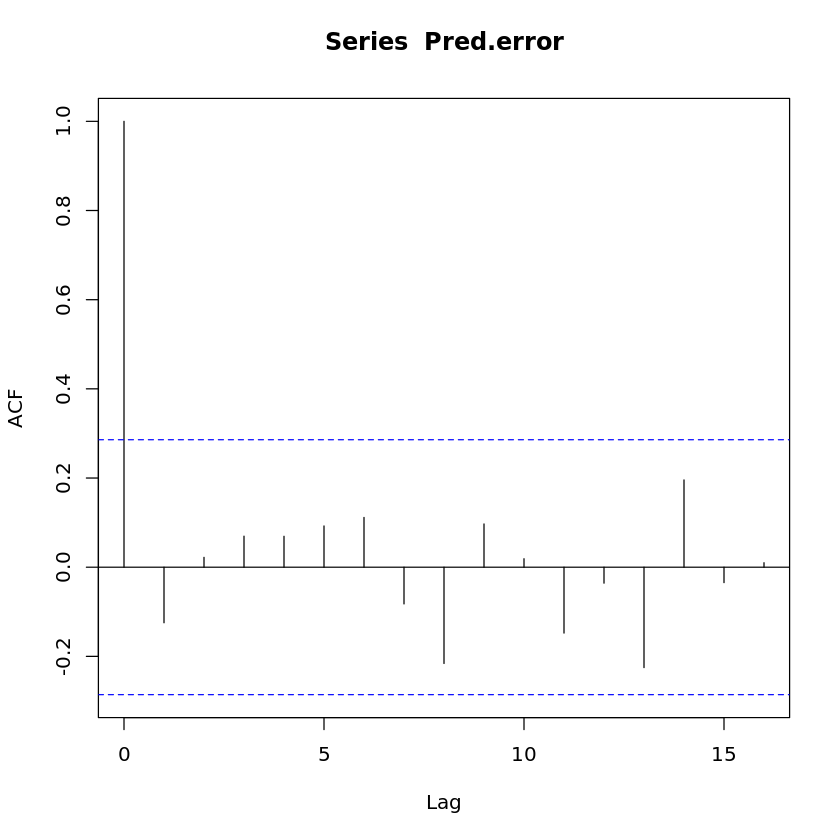

In [20]:
acf(Pred.error)